## Neural Network is certain classes of mathematical equation
 1. BackPropogation Neural Net Engine is different from the Nueral nets or say Libs, and it doesn't know anything about it
## We can build neural net/Libs on top of the backprop algorythm

## how to define the Neural network libs is that, 
   1. Define one neuron (perceptron) as class
   2. Define Layers of neuron as class
   3. Define multi layer perceptrons(neurons) as class, it is basically define the sequance of layers

This is all about NN is and rest of the thing is efficiency means most of the thing is efficeincy

Before that you must need to know what is the derivative is in mathematics

In [2]:
import math
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

getting into one scaler input x and deriving derivative of this function

In [2]:
def f(x):
    return 3*x**2-4*x+5
def dfx(dx):
    return 6*dx-4

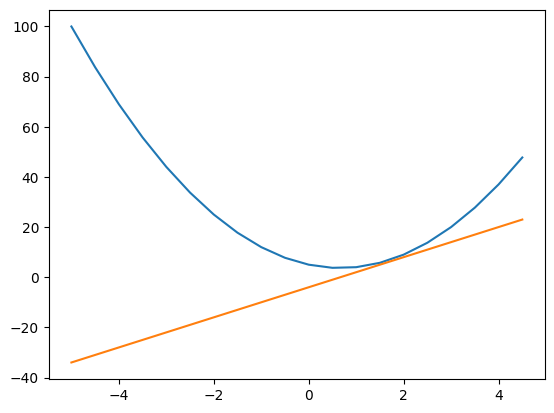

In [3]:
f(5)
xs = np.arange(-5,5,0.5) 
ys = f(xs)
dys = dfx(xs)
plt.plot(xs, ys)
plt.plot(xs,dys)

In [4]:
h = 0.00001
x =2/3
(f(x+h)-f(x))/h # slop is zero at value 2/3+0.00001

3.0000002482211127e-05

Lets take little bit more complicated 3 scalar value input

In [5]:
a = 2
b = 7
c = -10
def d(a,b,c):
    return a*b+c
print(d(a,b,c))

4


In [6]:
h =0.0001
# lets slightly increase the a and take slope/derivative
d1 = d(a,b,c)
d2 = d(a+h,b,c)
print("d1",d1)
print("d2",d2)
print("slope",(d2-d1)/h)

d1 4
d2 4.000700000000002
slope 7.000000000019213


slope positive indicate/behaviour the direction of function upword or downword
# so basically neural network is masive mathematical expression and it is neccessary to maintain the scaller value in some kind of data structure
### inshort saying if you want to print "JARVIS" in console or in blue wire diagram :)

In [3]:
# defining object/DS to hold the expression 
class value:
    def __init__(self, data, _children=(), _op=""):
        self.data = data
        self._prev = set(_children)
        self._op = _op

    def __repr__(self) -> str:
        return f"Value(data={self.data})"
    
    def __add__(self, other): 
        out = value(self.data + other.data, (self,other),"+")
        return out
    
    def __mul__(self, other): 
        out = value(self.data * other.data, (self,other),"*")
        return out
    
    def __pow__(self, other): 
        out = value(self.data ** other.data, (self,other),"^")
        return out

    def __sub__(self, other):
        out = value(self.data - other.data, (self,other),"-")
        return out
    
    def __truediv__(self, other): 
        if (other.data ==0):
            raise ZeroDivisionError("Cant divide by zero")
        out = value(self.data / other.data, (self,other),"/")
        return out
    # def __sub__(self, data): 
    # def __mul__(self, data): 
    # def __div__(self, data): 
    # def __pow__(self, data[, modulo]):

In [4]:
a =value(5)
b= value(7)
c =value(-2)
x =value(4)
y =value(12)
z =value(7)
k =value(8)

d= a*c+b-z/x-k

d._prev

{Value(data=-4.75), Value(data=8)}

In [90]:
9/-5

-1.8

In [5]:
def trace(value):
    nodes, edges = set(), set()
    def backprop(prev):
        if prev not in nodes:
            nodes.add(prev)
            for child in prev._prev:
                edges.add((child, prev))
                backprop(child)
    backprop(value)
    return nodes, edges

In [6]:
nodes, edges = trace(d)

In [17]:
nodes

{Value(data=-10), Value(data=-2), Value(data=-3), Value(data=5), Value(data=7)}

In [15]:
for n in nodes:
    print(n.data)

-4.75
7
4
-10
8
7
-12.75
5
-2
1.75
-3


In [9]:
edges

{(Value(data=-10), Value(data=-3)),
 (Value(data=-2), Value(data=-10)),
 (Value(data=5), Value(data=-10)),
 (Value(data=7), Value(data=-3))}

In [10]:
import graphviz

In [7]:
import graphviz
dot = graphviz.Digraph(format = 'svg', graph_attr={'rankdir':'LR'})
checker = set()

for n1, n2 in edges: 
        dot.edge(str(n1.data),n2._op)
        # dot.node(n2._op)
        if n2._op not in checker:
                checker.add(n2._op)
                dot.edge(n2._op,str(n2.data))
dot
# checker

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [14]:
ps = graphviz.Digraph(format = 'svg', graph_attr={'rankdir':'LR'})


ps.edge('parrot', 'soul')
ps.edge('dead', 'soul')
ps.node('reincarnation')
ps.edge( 'soul','reincarnation')

ps.node("egg")
ps.edge("egg", 'newparrot')
ps.edge("reincarnation", 'newparrot')


ps

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH